<a href="https://colab.research.google.com/github/tokaalaa/DM_Course/blob/main/sheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
from sklearn.neighbors import kneighbors_graph
import numpy as np
from sklearn.cluster import KMeans

# Data Points

In [ ]:
X = np.array([[2, 4],#p
     [3, 3],#v
     [3, 4],#q
     [5, 4],#r
     [5, 6],#h
     [5, 8],#a
     [6, 4],#s
     [6, 5],#k
     [6, 7],#d
     [7, 3],#w
     [7, 4],#t
     [8, 2],#x
     [9, 4],#l
     [10, 6],#i
     [10, 7],#e
     [10, 9],#b
     [11, 5],#m
     [11, 8],#c
     [12, 7],#f
     [13, 6],#j
     [13, 7],#g
     [14, 6],#n
     [15, 4],#u
     [15, 5]#o
     ])

# Plotting

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

def plot_clusters():
    colors = ['red','green','blue','purple','black', 'yellow']

    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=label, cmap=matplotlib.colors.ListedColormap(colors))

# **KMeans**

## k = 2

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
label = kmeans.labels_
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

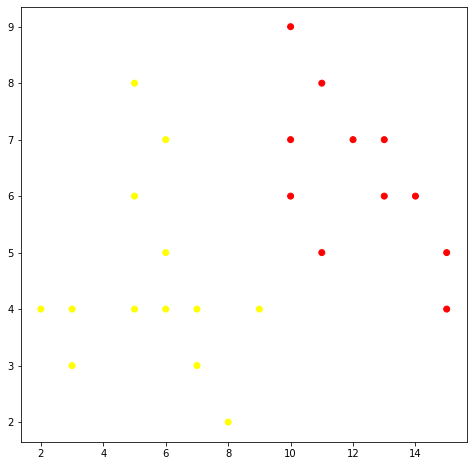

In [ ]:
plot_clusters()

## k = 3

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
label = kmeans.labels_
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import f1_score
y_true = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2,2,  2, 2,
       2, 2,2]

print(f1_score(y_true, label, average=None))

from sklearn.metrics import classification_report
print(classification_report(y_true,label))

[0.11764706 0.4        0.625     ]
              precision    recall  f1-score   support

           0       0.14      0.10      0.12        10
           1       0.25      1.00      0.40         3
           2       1.00      0.45      0.62        11

    accuracy                           0.38        24
   macro avg       0.46      0.52      0.38        24
weighted avg       0.55      0.38      0.39        24



In [ ]:
#compute betacv
from scipy.spatial import distance_matrix
Nin = 97 #12c2+7c2+5c2
Win1= distance_matrix(X[0:12], X[0:12])#c1
Win1  = np.sum(Win1)
Win2= distance_matrix(X[12:19], X[12:19])#c2
Win2  = np.sum(Win2)
Win3= distance_matrix(X[19:24], X[19:24])#c3
Win3  = np.sum(Win3)
Win = 0.5*(Win1+Win2+Win3)

Nout = 179 #12*5+12*7+7*5
Wout1 = distance_matrix(X[0:12], X[12:19])#c1,c2
Wout1 = np.sum(Wout1)
Wout2 = distance_matrix(X[0:12], X[19:24])#c1,c3
Wout2 = np.sum(Wout2)
Wout3 = distance_matrix(X[19:24], X[12:19])#c3,c2
Wout3 = np.sum(Wout3)
Wout = Wout1 + Wout2 + Wout3
BetaCV = Win * Nout / (Wout * Nin)
BetaCV

0.4417451872558242

In [ ]:
#compute Ncut
NC1 = 1/(1+ Win1 / (Win1+Wout1+Wout2))
NC2 = 1/(1+ Win2 / (Win2+Wout1+Wout3))
NC3 = 1/(1+ Win3 / (Win3+Wout3+Wout2))
NC = NC1 + NC2 + NC3
NC

2.601089636353416

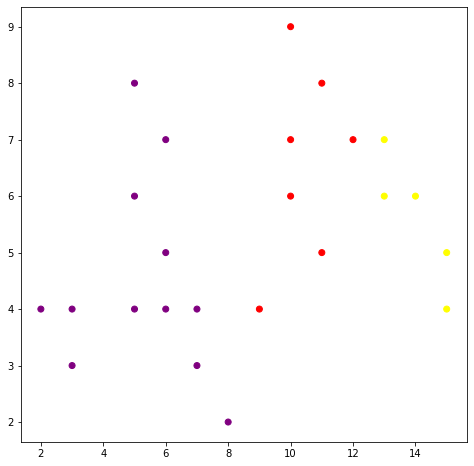

In [ ]:
plot_clusters()

## k = 4

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
label = kmeans.labels_
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0], dtype=int32)

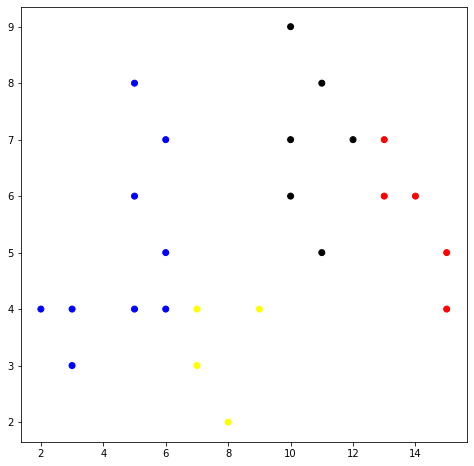

In [ ]:
plot_clusters()

## k = 5

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
label = kmeans.labels_
kmeans.labels_

array([3, 3, 3, 3, 4, 4, 1, 4, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2], dtype=int32)

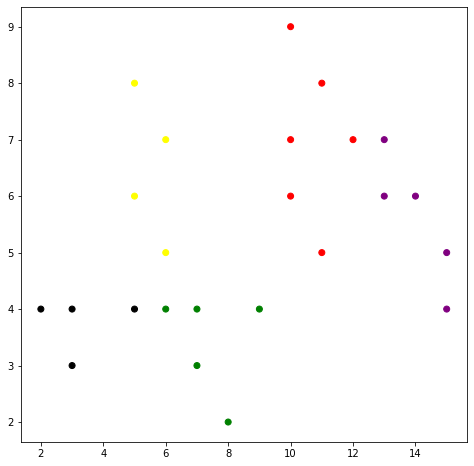

In [ ]:
plot_clusters()

## k = 6

In [ ]:
kmeans = KMeans(n_clusters=6).fit(X)
label = kmeans.labels_
kmeans.labels_

array([5, 5, 5, 1, 4, 4, 1, 1, 4, 1, 1, 1, 2, 2, 3, 3, 2, 3, 3, 0, 3, 0,
       0, 0], dtype=int32)

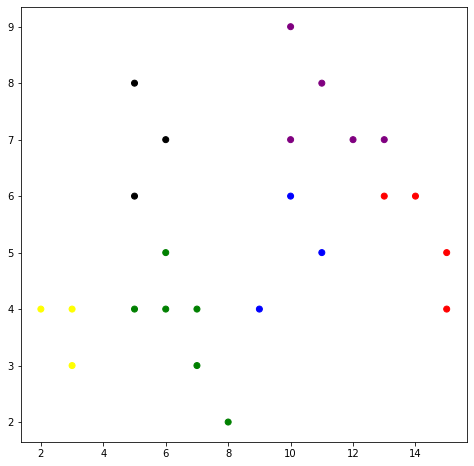

In [ ]:
plot_clusters()

# K-ways Normalized Cut

## k = 2

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2, assign_labels="discretize",affinity='nearest_neighbors', n_neighbors=3).fit(X)
label = clustering.labels_

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


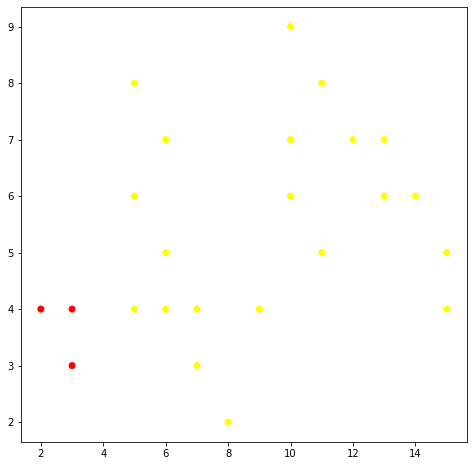

In [ ]:
plot_clusters()

## k = 3

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, assign_labels="discretize",affinity='nearest_neighbors', n_neighbors=3).fit(X)
label = clustering.labels_
label

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
#compute f_measure
from sklearn.metrics import f1_score
y_true = [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

print(f1_score(y_true, label, average=None))

from sklearn.metrics import classification_report
print(classification_report(y_true,label))

[1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
#compute betacv
from scipy.spatial import distance_matrix
Nin = 103 #3c2+10c2+11c2
Win1= distance_matrix(X[0:3], X[0:3])#c1
Win1  = np.sum(Win1)
Win2= distance_matrix(X[3:13], X[3:13])#c2
Win2  = np.sum(Win2)
Win3= distance_matrix(X[13:24], X[13:24])#c3
Win3  = np.sum(Win3)
Win = 0.5*(Win1+Win2+Win3)

Nout = 173 #3*10+3*11+10*11
Wout1 = distance_matrix(X[0:3], X[3:13])#c1,c2
Wout1 = np.sum(Wout1)
Wout2 = distance_matrix(X[0:12], X[13:24])#c1,c3
Wout2 = np.sum(Wout2)
Wout3 = distance_matrix(X[13:24], X[3:13])#c3,c2
Wout3 = np.sum(Wout3)
Wout = Wout1 + Wout2 + Wout3
BetaCV = Win * Nout / (Wout * Nin)
BetaCV

0.2738421578286656

In [ ]:
#compute Ncut
NC1 = 1/(1+ Win1 / (Win1+Wout1+Wout2))
NC2 = 1/(1+ Win2 / (Win2+Wout1+Wout3))
NC3 = 1/(1+ Win3 / (Win3+Wout3+Wout2))
NC = NC1 + NC2 + NC3
NC

2.663556861532425

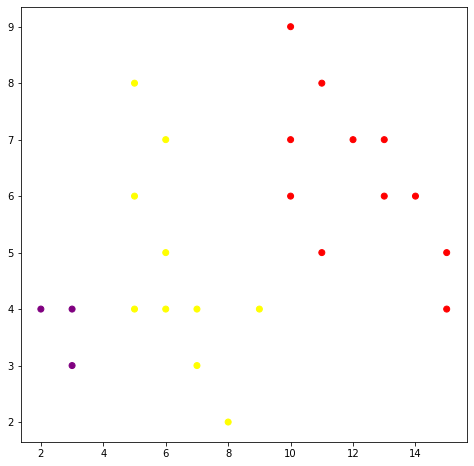

In [ ]:
plot_clusters()

## k = 4

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=4, assign_labels="discretize",affinity='nearest_neighbors', n_neighbors=3).fit(X)
label = clustering.labels_
label

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0])

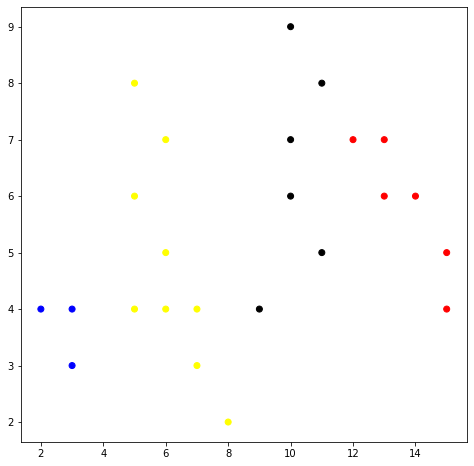

In [ ]:
plot_clusters()

## k = 5

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=5, assign_labels="discretize",affinity='nearest_neighbors', n_neighbors=3).fit(X)
label = clustering.labels_
label

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([1, 1, 1, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2])

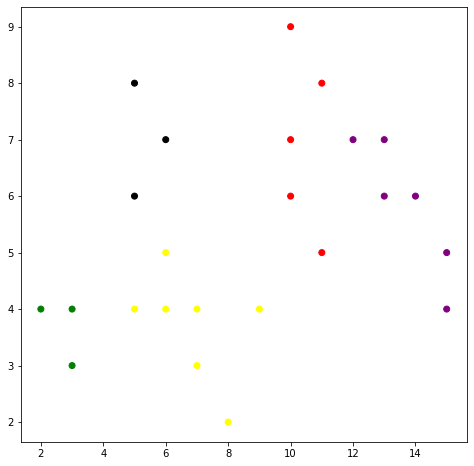

In [ ]:
plot_clusters()

## k = 6

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=6, assign_labels="discretize",affinity='nearest_neighbors', n_neighbors=3).fit(X)
label = clustering.labels_
label

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


array([0, 0, 0, 4, 2, 2, 4, 4, 2, 3, 3, 3, 3, 5, 5, 5, 3, 5, 5, 1, 1, 1,
       1, 1])

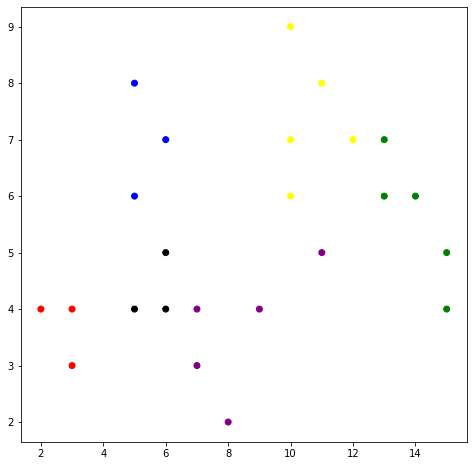

In [ ]:
plot_clusters()